In [ ]:
import lsst.daf.butler

In [ ]:


f =plt.figure()
ax = f.add_subplot(111)
for CCD in chips:
    w=df['detector'] ==CCD
    corners=df[w].copy()
    plt.fill(corners['x']*180/3.14, corners['y']*180/3.14, fc='#0fea72')

circle1=Circle((0, 0), radius=2.06, edgecolor="blue", fc='none', linewidth=1.0, linestyle='dashdot')
ax.add_patch(circle1)
circle2=Circle((0, 0), radius=1.75, edgecolor="#ea0f87", fc='none', linewidth=1.0)
ax.add_patch(circle2)
circle3=Circle((0, 0), radius= 2.06+0.2, edgecolor="#999999", fc='none', linestyle='--', linewidth=1.5)
ax.add_patch(circle3)


plt.gca().set_aspect("equal")


plt.xlabel("X Pupil (Degrees)")
plt.ylabel("Y Pupil (Degrees)")

plt.legend([circle3,circle1,circle2], ["Assist+Rebound \n search radius \n + buffer \n (r=2.08 deg)","r=2.06 deg", "r=1.75 deg \n (90% fill factor)"], bbox_to_anchor=(1.0, 1.0),fontsize='small', fancybox=True)
plt.tight_layout()
#plt.savefig("sorcha_fovs.pdf")

In [ ]:
calexp.getWcs().pixelToSky(calexp.getBBox().endX, calexp.getBBox().endY).getRa().asDegrees()
calexp.visitInfo.boresightRotAngle.asDegrees()

# Start

In [30]:
import numpy as np

import matplotlib.pyplot as plt
plt.ion()

In [1]:
import lsst.daf.butler

In [5]:
import lsst.afw.geom as afwGeom
import lsst.afw.cameraGeom as cameraGeom

In [2]:
repo = '/repo/embargo'
collection = 'LSSTComCam/nightlyValidation'

In [4]:
butler = lsst.daf.butler.Butler(repo, collections=collection)
camera = butler.get('camera', instrument='LSSTComCam')

In [6]:
# https://lsstc.slack.com/archives/C2JPMCF5X/p1569266787124100
# https://community.lsst.org/t/constructing-a-wcs-from-camera-geometry/3039
def getWcsFromDetector(detector, boresight, rotation=0*lsst.geom.degrees, flipX=False):
    """Given a detector and (boresight, rotation), return that detector's WCS

    Parameters
    ----------
    detector : `lsst.afw.cameraGeom.Detector`
        A detector in a camera.
    boresight : `lsst.geom.SpherePoint`
       The boresight of the observation.
    rotation : `lsst.afw.geom.Angle`, optional
        The rotation angle of the camera.
        The rotation is "rotskypos", the angle of sky relative to camera
        coordinates (from North over East).
    flipX : `bool`, optional
        Flip the X axis?

    Returns
    -------
    wcs : `lsst::afw::geom::SkyWcs`
        The calculated WCS.
    """
    trans = detector.getTransform(detector.makeCameraSys(cameraGeom.PIXELS),
                                  detector.makeCameraSys(cameraGeom.FIELD_ANGLE))

    wcs = afwGeom.makeSkyWcs(trans, rotation, flipX, boresight)

    return wcs

In [7]:
boresight = lsst.geom.SpherePoint(180., -1., units=lsst.geom.degrees)
rotation = 45.*lsst.geom.degrees
flipX = False

In [8]:
det = camera[0]

In [39]:
for det in camera:
    print(det.getName())

R22_S00
R22_S01
R22_S02
R22_S10
R22_S11
R22_S12
R22_S20
R22_S21
R22_S22


In [9]:
det.getName()

'R22_S00'

In [10]:
wcs = getWcsFromDetector(det, boresight, rotation=rotation, flipX=flipX)

Non-standard SkyWcs (Frames: PIXELS, IWC, SKY): 
Sky Origin: (180.0000000000, -1.0000000000)
Pixel Origin: (6261.5, 6225.5)
Pixel Scale: 0.200181 arcsec/pixel

In [27]:
sky = wcs.pixelToSky(det.getBBox().endX, det.getBBox().endY)
ra = sky.getRa().asDegrees()
dec = sky.getDec().asDegrees()

In [28]:
def getCorners(det, wcs):
    sky_00 = wcs.pixelToSky(det.getBBox().beginX, det.getBBox().beginY)
    sky_01 = wcs.pixelToSky(det.getBBox().beginX, det.getBBox().endY)
    sky_11 = wcs.pixelToSky(det.getBBox().endX, det.getBBox().endY)
    sky_10 = wcs.pixelToSky(det.getBBox().endX, det.getBBox().beginY)
    ra = np.array([
        sky_00.getRa().asDegrees(),
        sky_01.getRa().asDegrees(),
        sky_11.getRa().asDegrees(),
        sky_10.getRa().asDegrees(),
    ])
    dec = np.array([
        sky_00.getDec().asDegrees(),
        sky_01.getDec().asDegrees(),
        sky_11.getDec().asDegrees(),
        sky_10.getDec().asDegrees(),
    ])
    return ra, dec

In [222]:
def plotFootprint(ra, dec, rotSkyPos, camera):
    boresight = lsst.geom.SpherePoint(ra, dec, units=lsst.geom.degrees)
    rotation = rotSkyPos * lsst.geom.degrees

    for det in camera:
        wcs = getWcsFromDetector(det, boresight, rotation=rotation, flipX=flipX)
        ra, dec = getCorners(det, wcs)
        plt.fill(ra, dec, fc='blue', alpha=0.2)

In [35]:
ra, dec = getCorners(det, wcs)

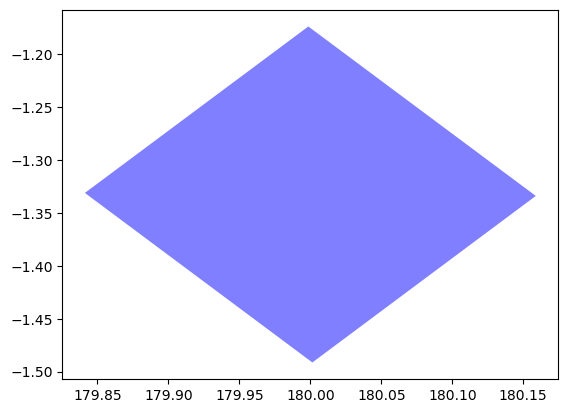

In [38]:
plt.figure()
plt.fill(ra, dec, fc='blue', alpha=0.5)
#plt.scatter(ra, dec)

In [65]:
scale = 0.71 / 2

In [77]:
x_grid = np.array([-1. * scale, -1. * scale, scale, scale])
y_grid = np.array([-1. * scale, scale, scale, -1. * scale])

In [204]:
def rotate(x, y, angle):
    angle = np.radians(angle)
    x_rot = x * np.cos(angle) - y * np.sin(angle) 
    y_rot = x * np.sin(angle) + y * np.cos(angle) 
    return x_rot, y_rot

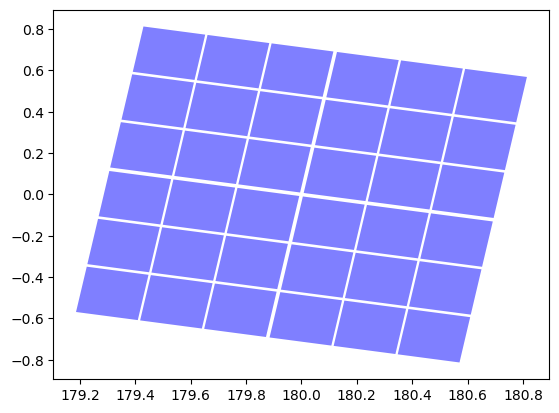

In [211]:
angle = 10.
x_grid_rot, y_grid_rot = rotate(x_grid, y_grid, -1. * angle)

plt.figure()
#plotFootprint(180., 0., 0., camera)
#plotFootprint(180. + 0.71, 0., 0., camera)
#plotFootprint(180. + 0.71, 0. + 0.71, 0., camera)
#plotFootprint(180., 0. + 0.71, 0., camera)
for x, y in zip(x_grid_rot, y_grid_rot):
    plotFootprint(180. + x, y, angle, camera)

In [215]:
def plotGridFootprint(ra, dec, rotSkyPos):
    scale = 0.71 / 2
    x_grid = np.array([-1. * scale, -1. * scale, scale, scale])
    y_grid = np.array([-1. * scale, scale, scale, -1. * scale])

    x_grid_rot, y_grid_rot = rotate(x_grid, y_grid, -1. * rotSkyPos)

    for x, y in zip(x_grid_rot, y_grid_rot):
        plotFootprint(ra + x, dec + y, rotSkyPos, camera)

Text(0, 0.5, 'Dec (deg)')

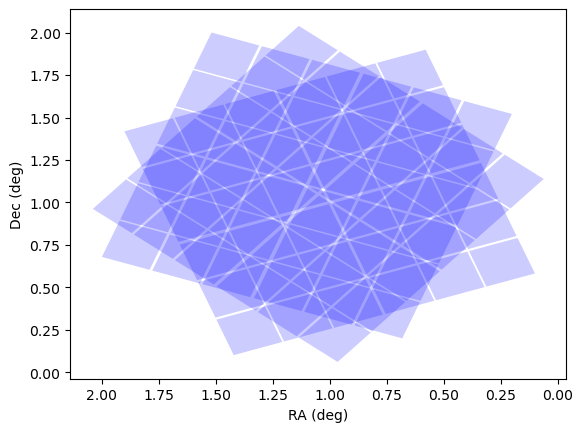

In [228]:
plt.figure()
plotGridFootprint(1., 1., 20.)
plotGridFootprint(1. + 0.05, 1. + 0.05, 50.)
plotGridFootprint(1. + 0.1, 1. + 0.1, 70.)
plt.xlim(plt.xlim()[::-1])
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')